In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
from NikolaevskyDynamics.Nikolaevsky import NE

In [2]:
DOMAIN_SIZE = 50*np.pi
N_DOF = 512
DT = 0.05
r = np.linspace(0.0, 0.5, 200)
v = 0.20

np.random.seed(42)
u_0 = np.random.randn(N_DOF)
u_0 = np.tile(u_0, (len(r),1))

solver = NE(L=DOMAIN_SIZE, N=N_DOF, h=DT, u_0=u_0, r=r, v=v, precompute_step=round(1000 / DT), device='cuda')

Number of dynamics calculated: 100
using LSA damping
Stepping until t=1000.0


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:11<00:00, 1762.84it/s]


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:12<00:00, 1560.18it/s]


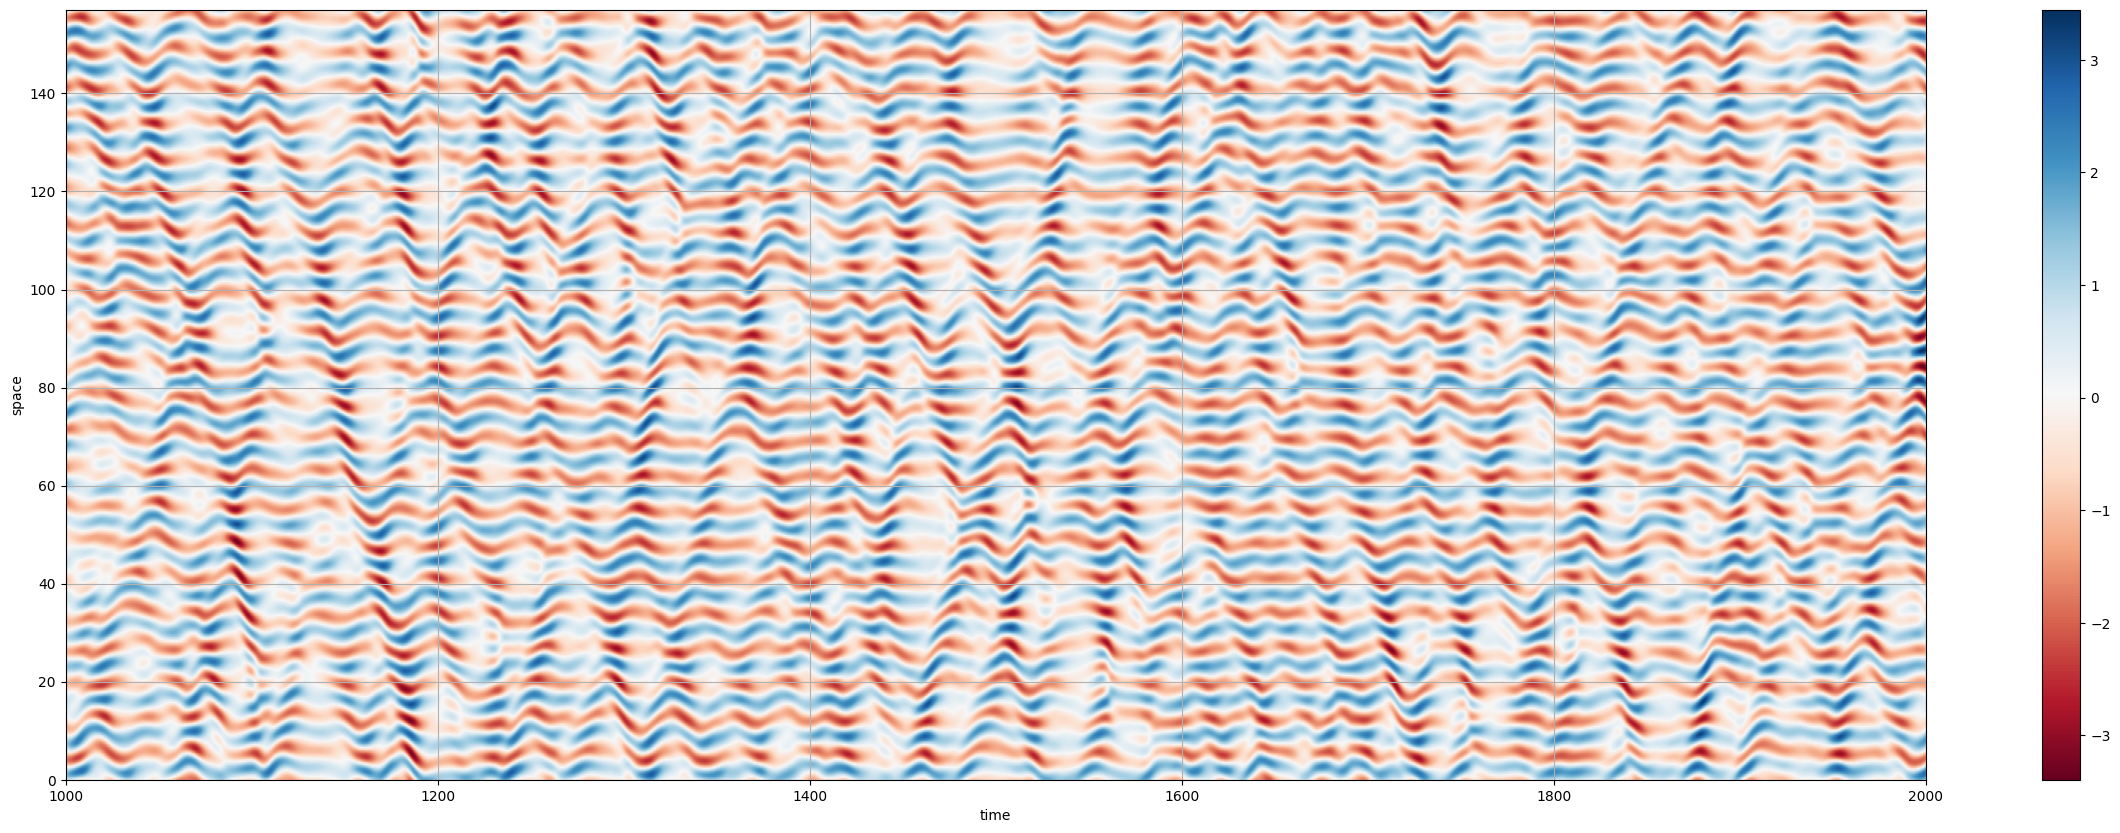

In [3]:
batch = 70
trj = solver.forward(round(1000 / DT), True)
plt.figure(figsize=(30, 10))
plt.imshow(
    trj[batch].T.cpu(),
    cmap="RdBu",
    aspect="auto",
    origin="lower",
    extent=(solver.t - (len(trj[batch])-1)*solver.h, solver.t, 0, solver.L),
)
plt.colorbar()
plt.xlabel("time")
plt.ylabel("space")
plt.grid()

In [3]:
LCE = solver.LCE(1, n_forward = round(0 / DT), n_compute = round(1500 / DT))

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:11<00:00, 1754.08it/s]
0it [00:00, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 30000/30000 [10:34<00:00, 47.31it/s]


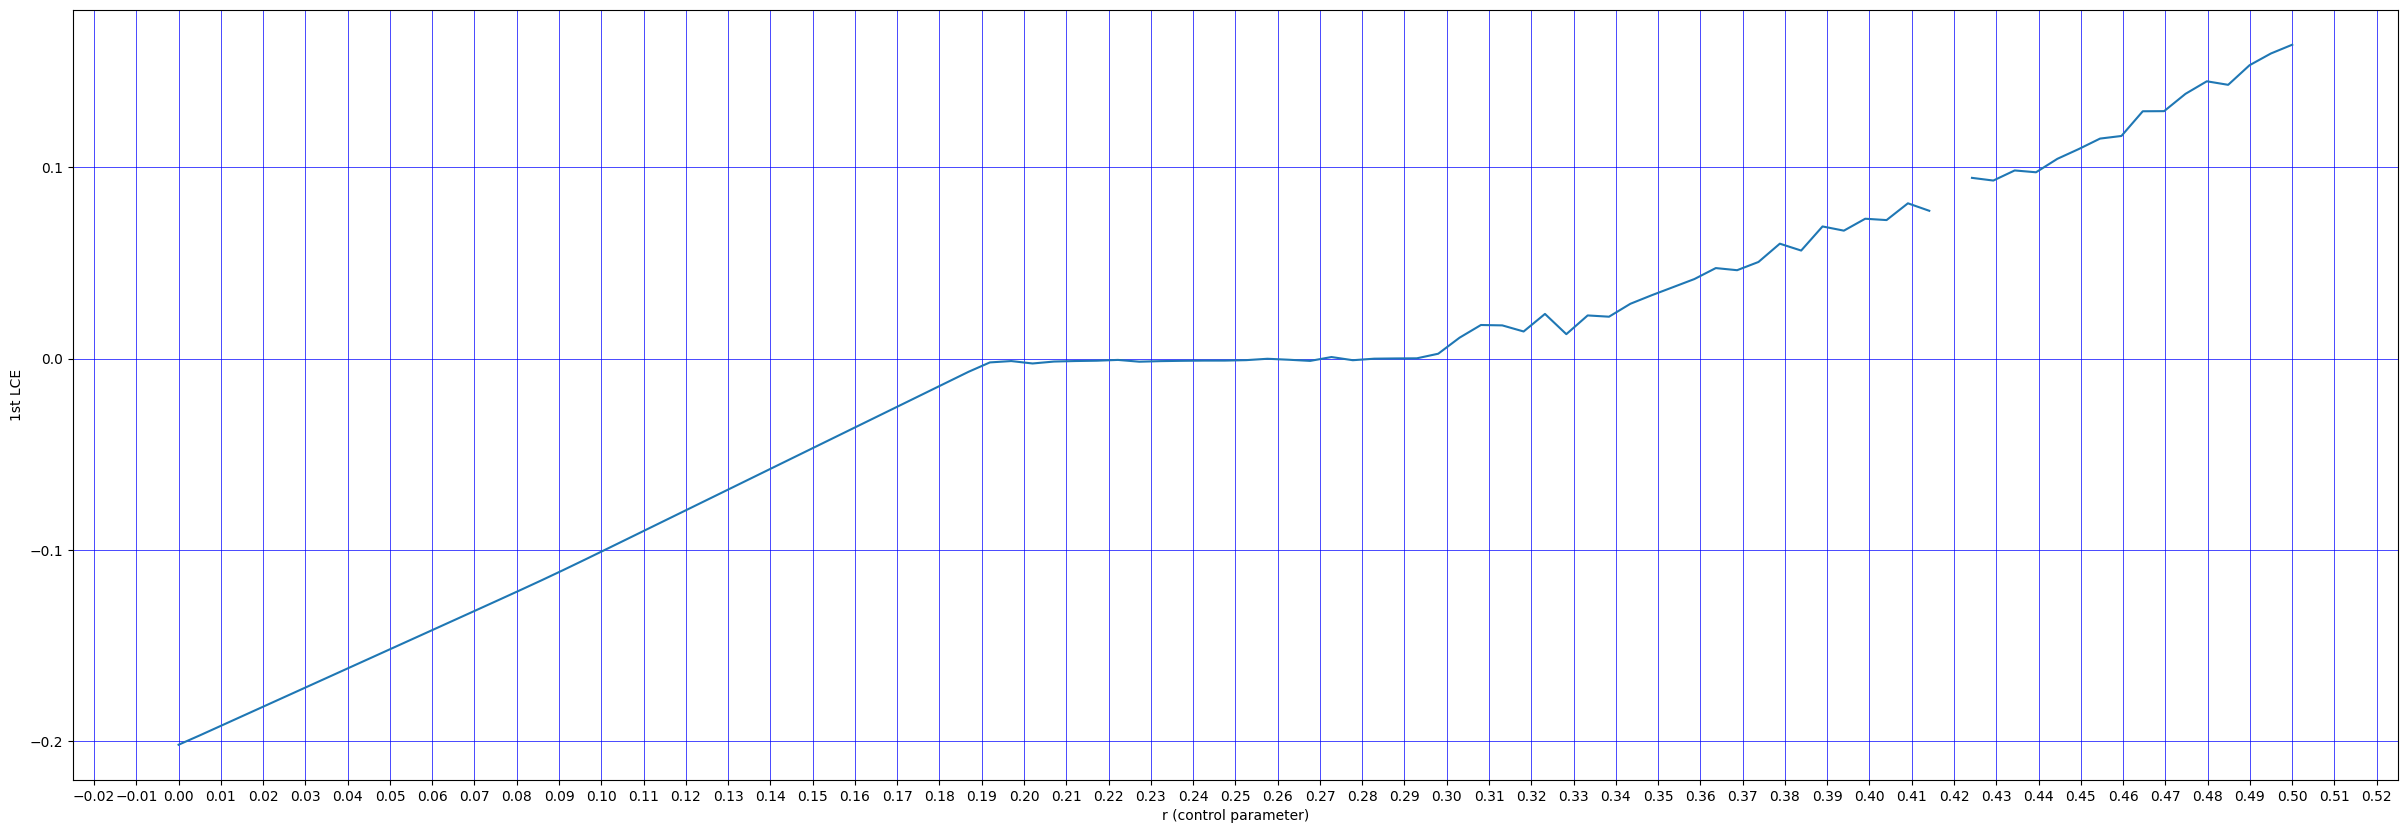

In [9]:
import matplotlib
plt.figure(figsize=(30, 10))
plt.plot(r,LCE[0].cpu())
plt.grid(which='major', color='blue', linestyle='-', linewidth=0.5)
plt.grid(which='minor', color='gray', linestyle='--', linewidth=0.3)
plt.xlabel("r (control parameter)")
plt.ylabel("1st LCE")

ax = plt.gca()
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.01))  # Major gridlines every 0.1
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.1))  # Major gridlines every 0.05
plt.show()